In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from feature_engine.outlier_removers import ArbitraryOutlierCapper

In [2]:
# let's create a data frame with a normal distributed variable x

np.random.seed(29) # for reproducibility

n = 200 # in the book we pass directly 200 within brackets, without defining n
x = np.random.randn(n) + 2
y = np.random.randn(n) * 2 + 4
z = np.random.randn(n) * 5 + 10

data = pd.DataFrame([x, y, z]).T
data.columns = ['x', 'y', 'z']

data.head()

,x,y,z
0,1.582518,6.903260,9.695655
1,2.706032,4.930279,14.363733
2,3.915985,4.688840,15.803355
3,-0.141755,3.488652,17.403682
4,2.719057,2.388501,20.859069


In [3]:
data.min()

x   -1.505401
y   -0.901451
z   -1.552986
dtype: float64

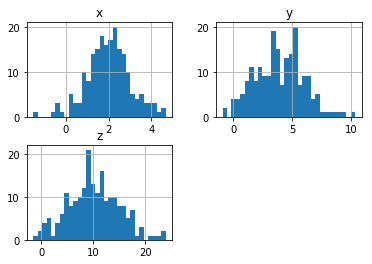

In [4]:
data.hist(bins=30)
plt.show()

In [5]:
data.loc[data['x'] < 0, 'x'] = 0
data.loc[data['y'] < 0, 'y'] = 0
data.loc[data['z'] < 0, 'z'] = 0

data.min()

x    0.0
y    0.0
z    0.0
dtype: float64

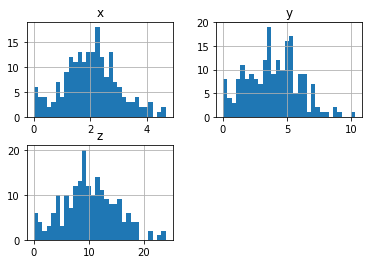

In [6]:
data.hist(bins=30)
plt.show()

## Zero coding with feature-engine

In [7]:
# let's create a data frame with a normal distributed variable x

np.random.seed(29) # for reproducibility

n = 200 # in the book we pass directly 200 within brackets, without defining n
x = np.random.randn(n) + 2
y = np.random.randn(n) * 2 + 4
z = np.random.randn(n) * 5 + 10

data = pd.DataFrame([x, y, z]).T
data.columns = ['x', 'y', 'z']

data.head()

,x,y,z
0,1.582518,6.903260,9.695655
1,2.706032,4.930279,14.363733
2,3.915985,4.688840,15.803355
3,-0.141755,3.488652,17.403682
4,2.719057,2.388501,20.859069


In [8]:
# create the capper

windsoriser = ArbitraryOutlierCapper(max_capping_dict=None,
                                     min_capping_dict={'x':0, 'y':0, 'z':0})

windsoriser.fit(data)

ArbitraryOutlierCapper(max_capping_dict=None, min_capping_dict=None)

In [9]:
data_t = windsoriser.transform(data)

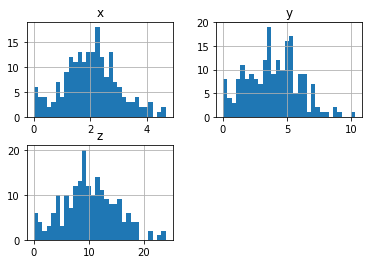

In [10]:
data_t.hist(bins=30)
plt.show()

In [11]:
# we can inspect the minimum caps for each variable
windsoriser.left_tail_caps_

{'x': 0, 'y': 0, 'z': 0}

In [12]:
# we can inspect the maximum caps for each variable
windsoriser.right_tail_caps_

{}